# Traverse Quad Mesh in a Straight Line

In [4]:
import compas
from compas.datastructures import Mesh
from compas_plotters import MeshPlotter

## Create Mesh from `faces.obj`

In [5]:
mesh = Mesh.from_obj(compas.get('faces.obj'))

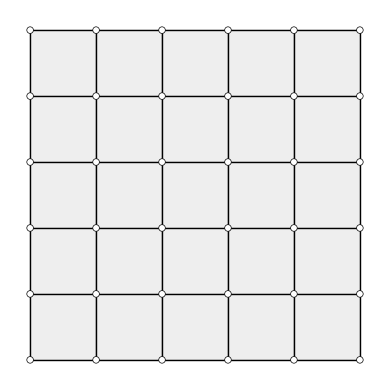

In [6]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices()
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

**Visualize the vertices on the boundary and label with their identifier.**

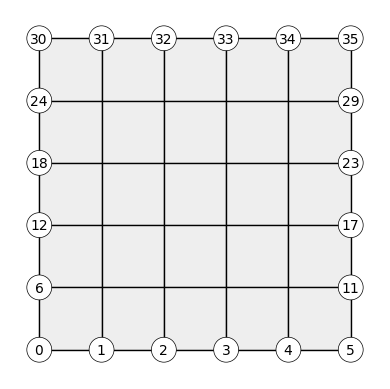

In [7]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(radius=0.4, text='key', keys=list(mesh.vertices_on_boundary()))
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

## Select a vertex on the boundary

In [8]:
start = 3

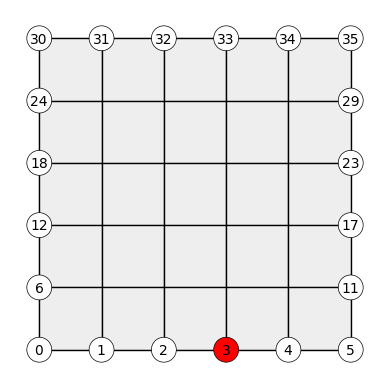

In [9]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=list(mesh.vertices_on_boundary()), facecolor={start: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

## Find the neighbours of this vertex

In [10]:
nbrs = mesh.vertex_neighbors(start)
print(nbrs)

[2, 9, 4]


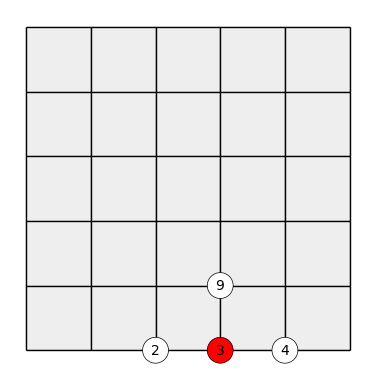

In [11]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=[start] + nbrs, facecolor={start: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

## Find the neighbour not on the boundary

In [12]:
for nbr in nbrs:
    print(nbr, mesh.is_vertex_on_boundary(nbr))

2 True
9 False
4 True


In [13]:
current = start
for nbr in nbrs:
    if not mesh.is_vertex_on_boundary(nbr):
        previous, current = current, nbr
        break
print(previous, current)

3 9


## Find the neighbours of this vertex in cycling order

In [14]:
nbrs = mesh.vertex_neighbors(current, ordered=True)
print(nbrs)

[3, 8, 15, 10]


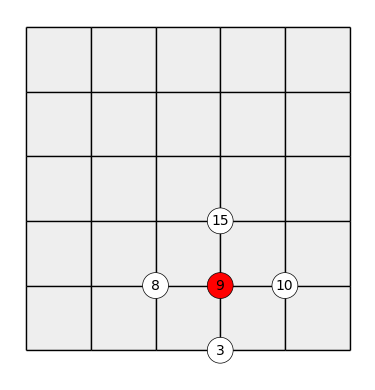

In [15]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=[current] + nbrs, facecolor={current: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

## Find the opposite neighbour of the previous vertex

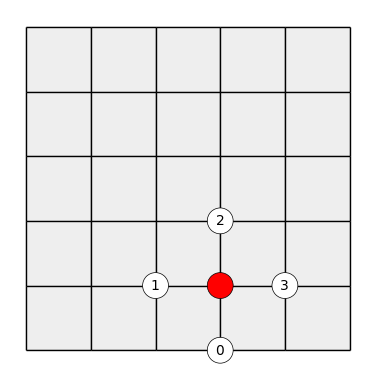

In [16]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4,
    text={key: index for index, key in enumerate(nbrs)},
    keys=[current] + nbrs,
    facecolor={current: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

In [17]:
i = nbrs.index(previous)
print(i)

0


In [18]:
previous, current = current, nbrs[i - 2]
print(previous, current)

9 15


In [19]:
nbrs = mesh.vertex_neighbors(current, ordered=True)

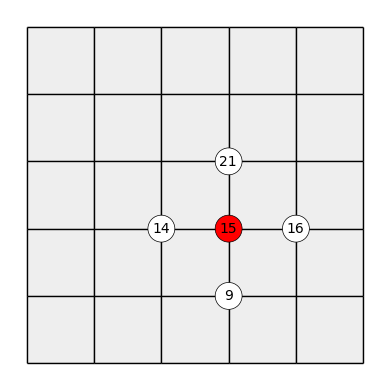

In [20]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=[current] + nbrs, facecolor={current: (255, 0, 0)})
plotter.draw_edges()
plotter.draw_faces()
plotter.show()

In [21]:
start = 3
path = [start]
nbrs = mesh.vertex_neighbors(start)

current = start
for nbr in nbrs:
    if not mesh.is_vertex_on_boundary(nbr):
        previous, current = current, nbr
        break

while True:
    path.append(current)
    if mesh.is_vertex_on_boundary(current):
        break
    nbrs = mesh.vertex_neighbors(current, ordered=True)
    i = nbrs.index(previous)
    previous, current = current, nbrs[i - 2]

print(path)

[3, 9, 15, 21, 27, 33]


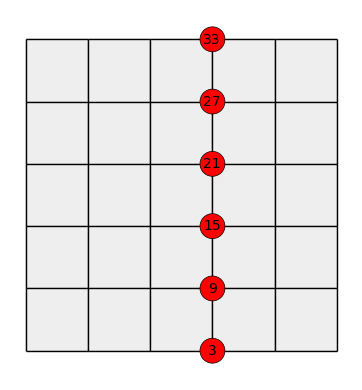

In [22]:
plotter = MeshPlotter(mesh, figsize=(4, 4))
plotter.draw_vertices(
    radius=0.4, text='key', keys=path, facecolor=(255, 0, 0))
plotter.draw_edges()
plotter.draw_faces()
plotter.show()